# OpenAPS IOB Calculations
----
The code in this notebook will replicate and visualize the IOB calculations used in the [OpenAPS project](https://github.com/openaps/oref0).

Specifically, it will replicate the javascript code found in [`OpenAPS/oref0/lib/iob/calculation.js`](https://github.com/openaps/oref0/blob/master/lib/iob/calculate.js) and plot insulin action curves for a set of Duration of Insulin Activity (`dia`) values.

Two examples of what I think we're aiming to replicate can be found...

Here: [http://journals.sagepub.com/doi/pdf/10.1177/193229680900300319](http://journals.sagepub.com/doi/pdf/10.1177/193229680900300319)

and

Here: [https://www.hindawi.com/journals/cmmm/2015/281589/](https://www.hindawi.com/journals/cmmm/2015/281589/)




In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Coefficients used in estimating the percent of insulin remaining, or (alternatively) the insulin action/decay curve.
# Coeff[0] = alpha * 1
# Coeff[1] = beta1 * x^2
# Coeff[2] = beta2 * x
insulin_action_coeffs = [[1.000000, -0.001852, 0.001852],   # Applied between [0,peak)
                         [0.555560, 0.001323, -0.054233]]   # Applied between [peak,end)
# Source: ?????

In [129]:
def calc_IOB(dia):
    
    # Default to 3 hour Duration of Insulin Activity (dia), 
    # but scale peak and end for longer (or shorter) dia values
    #dia_scaler = dia / 3.0
    #peak = 75 * dia_scaler
    #end = 180 * dia_scaler
    
    peak = 75
    end = 180
    
    x_list = []
    iob_list = [] 
    
    for i_min in range(0, end):
        
        i_min = i_min * 3.0 / dia
        
        if (i_min < peak):
            x = (i_min / 5) + 1
            x_list.append(x)
            iob_pct = insulin_action_coeffs[0][0] + insulin_action_coeffs[0][1] * x**2 + insulin_action_coeffs[0][2] * x
            iob_list.append(iob_pct)
        elif (i_min < end):
            x = (i_min - peak) / 5
            x_list.append(x)
            iob_pct = insulin_action_coeffs[1][0] + insulin_action_coeffs[1][1] * x**2 + insulin_action_coeffs[1][2] * x
            iob_list.append(iob_pct)plt.axis([0,180,-0.2,1.2])
plt.ylabel('Insulin Remaining (%)')
plt.xlabel('Minutes')
plt.suptitle('Insulin Action Curve (DIA = 3)', fontsize=14, fontweight='bold')
dict_of_dfs_by_dia[3]['iob_pct_dia_3'].plot(kind='line').grid(True)
    
    return x_list, iob_list   

In [148]:
# Create a dictionary of DataFrames -- one for each value of DIA between 2 and 8
dict_of_dfs_by_dia = {}

for dia in range(2, 9):                           # NB: range ends at n-1
    x_list, iob_list = calc_IOB(dia)
    iob_df = pd.DataFrame({'x' : x_list,
                           'iob_pct_dia_'+str(dia) : iob_list})
    dict_of_dfs_by_dia.update({dia : iob_df})


2
3
4
5
6
7
8


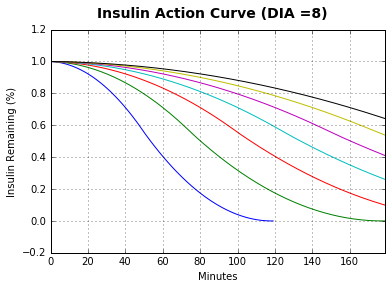

In [214]:
for dia in range(2,9):
    dia_str = str(dia)
    print (dia_str)
    plt.axis([0,180,-0.2,1.2])
    plt.ylabel('Insulin Remaining (%)')
    plt.xlabel('Minutes')
    plt.suptitle('Insulin Action Curve (DIA =' + dia_str + ')', fontsize=14, fontweight='bold')
    dict_of_dfs_by_dia[dia]['iob_pct_dia_' + dia_str].plot(kind='line').grid(True)

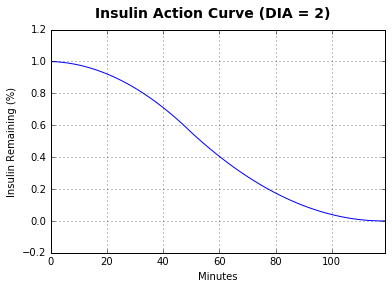

In [201]:
plt.axis([0,180,-0.2,1.2])
plt.ylabel('Insulin Remaining (%)')
plt.xlabel('Minutes')
plt.suptitle('Insulin Action Curve (DIA = 2)', fontsize=14, fontweight='bold')
dict_of_dfs_by_dia[2]['iob_pct_dia_2'].plot(kind='line').grid(True)

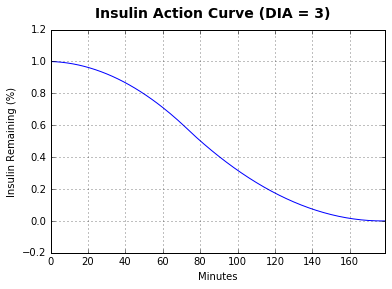

In [205]:
plt.axis([0,180,-0.2,1.2])
plt.ylabel('Insulin Remaining (%)')
plt.xlabel('Minutes')
plt.suptitle('Insulin Action Curve (DIA = 3)', fontsize=14, fontweight='bold')
dict_of_dfs_by_dia[3]['iob_pct_dia_3'].plot(kind='line').grid(True)

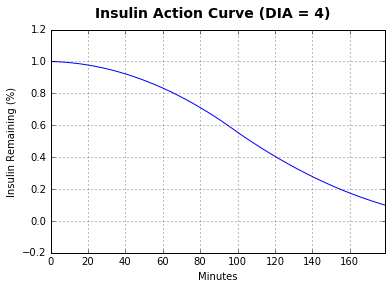

In [206]:
plt.axis([0,180,-0.2,1.2])
plt.ylabel('Insulin Remaining (%)')
plt.xlabel('Minutes')
plt.suptitle('Insulin Action Curve (DIA = 4)', fontsize=14, fontweight='bold')
dict_of_dfs_by_dia[4]['iob_pct_dia_4'].plot(kind='line').grid(True)

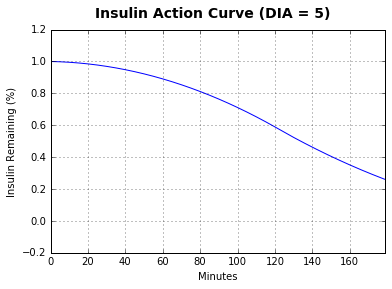

In [207]:
plt.axis([0,180,-0.2,1.2])
plt.ylabel('Insulin Remaining (%)')
plt.xlabel('Minutes')
plt.suptitle('Insulin Action Curve (DIA = 5)', fontsize=14, fontweight='bold')
dict_of_dfs_by_dia[5]['iob_pct_dia_5'].plot(kind='line').grid(True)

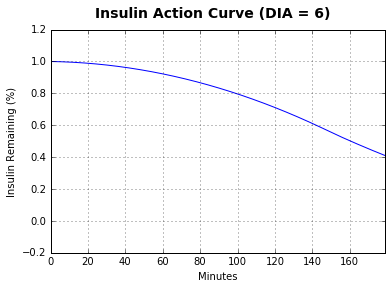

In [208]:
plt.axis([0,180,-0.2,1.2])
plt.ylabel('Insulin Remaining (%)')
plt.xlabel('Minutes')
plt.suptitle('Insulin Action Curve (DIA = 6)', fontsize=14, fontweight='bold')
dict_of_dfs_by_dia[6]['iob_pct_dia_6'].plot(kind='line').grid(True)

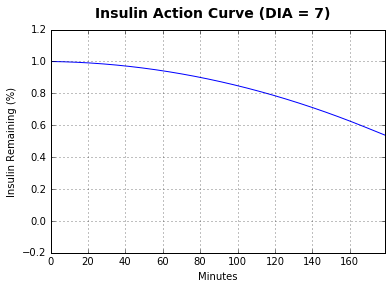

In [209]:
plt.axis([0,180,-0.2,1.2])
plt.ylabel('Insulin Remaining (%)')
plt.xlabel('Minutes')
plt.suptitle('Insulin Action Curve (DIA = 7)', fontsize=14, fontweight='bold')
dict_of_dfs_by_dia[7]['iob_pct_dia_7'].plot(kind='line').grid(True)

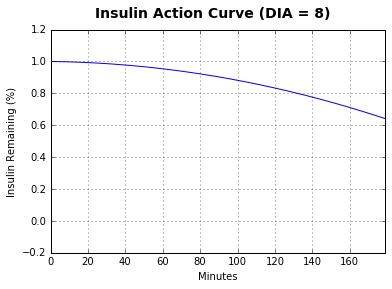

In [210]:
plt.axis([0,180,-0.2,1.2])
plt.ylabel('Insulin Remaining (%)')
plt.xlabel('Minutes')
plt.suptitle('Insulin Action Curve (DIA = 8)', fontsize=14, fontweight='bold')
dict_of_dfs_by_dia[8]['iob_pct_dia_8'].plot(kind='line').grid(True)